In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
elec_cons = pd.read_csv("total-electricity-consumption-us.csv")
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [6]:
elec_cons.shape

(51, 2)

In [12]:
# Quick check for null values 
elec_cons.isnull().values.any()

False

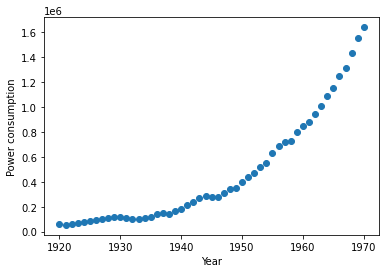

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Power consumption")
plt.scatter(elec_cons.Year, elec_cons.Consumption)
plt.show()

Can't go for a simple linear model as the shape doen't fit a straight line 

In [19]:
# Splitting the train and the test 
# Taking every 5 index value as a test set for proper unbaised test split 

size = len(elec_cons.index)
index = range(0,size,5)
train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]

print(len(train))
print(len(test))

40
11


In [45]:
X_train = train.Year.values.reshape(-1,1)
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1)
y_test = test.Consumption

In [43]:
?np.reshape

In [69]:
degree_list = [1,2,3]
r2_train = [] # for storing r squared of train data preds for different polynomials 
r2_test = [] # for storing r squared of test data preds for different polynomials 

for degree in degree_list:
    pipeline= Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                       ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    # training performance 
    y_train_pred = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_train_pred))
    # testing performance
    y_test_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_test_pred))
    

print(["For Degree 1      , For Degree 2      ,For Degree 3"])
print(r2_train)
print(r2_test)

['For Degree 1      , For Degree 2      ,For Degree 3']
[0.8423747402176137, 0.990889674455328, 0.9979789884378093]
[0.816517046382681, 0.9876080502746136, 0.9984899918580936]


As we can see improvement in r2 values as we increase the degree from 1 to 3.
cubic polynomial gives the best fit for both train and test dataset.

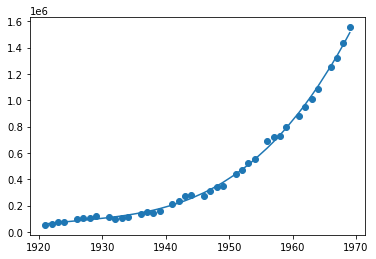

In [71]:
# plotting predictions for train

fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(X_train, y_train_pred)
plt.show()

We got very good fit with degree 3 polynomial 

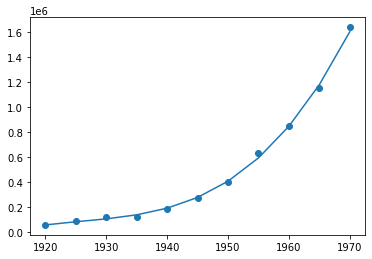

In [72]:
# plotting predictions for test

fig, ax = plt.subplots()
ax.scatter(X_test, y_test)
ax.plot(X_test, y_test_pred)
plt.show()